# Convolutional Neural Network

### Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Part 1 - Data Preprocessing

### Preprocessing the Training and Test set

In [34]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Keep only cats (label 3) and dogs (label 5)
train_mask = np.isin(train_labels, [3, 5]).flatten()
test_mask = np.isin(test_labels, [3, 5]).flatten()

X_train = train_images[train_mask]
y_train = train_labels[train_mask]
X_test = test_images[test_mask]
y_test = test_labels[test_mask]

# Convert labels: cat=0, dog=1
y_train = (y_train == 5).astype(int)
y_test = (y_test == 5).astype(int)

# Normalize images (like ImageDataGenerator style)
training_set = X_train / 255.0
test_set = X_test / 255.0

## Part 2 - Building the CNN

### Initialising the CNN

In [35]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [36]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))

### Step 2 - Pooling

In [37]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [38]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [39]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [40]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [41]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [42]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [43]:
cnn.fit(x=training_set, y=y_train, validation_data=(test_set, y_test), epochs=10, batch_size=32)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5547 - loss: 0.6841 - val_accuracy: 0.6710 - val_loss: 0.6113
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.6835 - loss: 0.5967 - val_accuracy: 0.7000 - val_loss: 0.5707
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.7098 - loss: 0.5594 - val_accuracy: 0.7185 - val_loss: 0.5425
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.7377 - loss: 0.5275 - val_accuracy: 0.7155 - val_loss: 0.5493
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.7541 - loss: 0.5023 - val_accuracy: 0.7360 - val_loss: 0.5285
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.7719 - loss: 0.4736 - val_accuracy: 0.7310 - val_loss: 0.5317
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7825 - loss: 0.4548 - val_accuracy: 0.7400 - val_loss: 0.5537
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8089 - loss: 0.4140 - 

### Evaluate on the full test set

In [44]:
test_loss, test_acc = cnn.evaluate(test_set, y_test)
print(f'Test accuracy: {test_acc:.4f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7527 - loss: 0.5592
Test accuracy: 0.7505


## Part 4 - Predictions on sample test images (with visualization)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


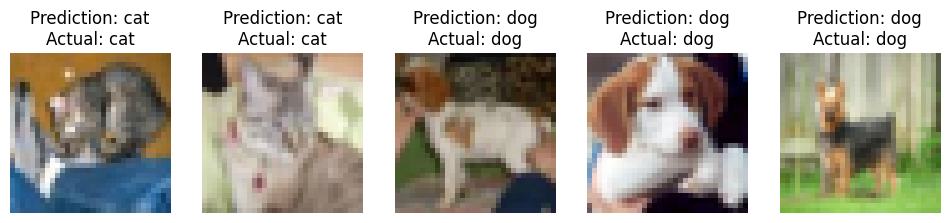

In [51]:
# Number of test images to visualize
num_samples = 5

plt.figure(figsize=(12, 4))
for i in range(num_samples):
    sample_image = test_set[i]
    sample_label = y_test[i]

    # Add batch dimension and predict
    sample_image_exp = np.expand_dims(sample_image, axis=0)
    prediction_prob = cnn.predict(sample_image_exp)
    prediction_label = 'dog' if prediction_prob[0][0] > 0.5 else 'cat'
    actual_label = 'dog' if sample_label == 1 else 'cat'

    # Display image with predicted and actual labels
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_image)
    plt.title(f"Prediction: {prediction_label}\nActual: {actual_label}")
    plt.axis('off')
